## Credit Card  Anamoly Detection

### Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Inspiration
Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.


In [1]:
# data manipulation
import numpy as np
import pandas as pd

#Library for Data Visualization.
import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV,KFold
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import roc_curve, auc
# Library for Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


: 

In [2]:
data=pd.read_csv(r"C:\Users\HP\Downloads\credit\creditcard.csv")
#display top 5 rows in the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#display top 5 rows in the data
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [8]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# Calculate the number of unique values in each column
for column in data.columns:
    print(f"{column} - Number of unique values : {data[column].nunique()}")
    print("=============================================================")

Time - Number of unique values : 124592
V1 - Number of unique values : 275663
V2 - Number of unique values : 275663
V3 - Number of unique values : 275663
V4 - Number of unique values : 275663
V5 - Number of unique values : 275663
V6 - Number of unique values : 275663
V7 - Number of unique values : 275663
V8 - Number of unique values : 275663
V9 - Number of unique values : 275663
V10 - Number of unique values : 275663
V11 - Number of unique values : 275663
V12 - Number of unique values : 275663
V13 - Number of unique values : 275663
V14 - Number of unique values : 275663
V15 - Number of unique values : 275663
V16 - Number of unique values : 275663
V17 - Number of unique values : 275663
V18 - Number of unique values : 275663
V19 - Number of unique values : 275663
V20 - Number of unique values : 275663
V21 - Number of unique values : 275663
V22 - Number of unique values : 275663
V23 - Number of unique values : 275663
V24 - Number of unique values : 275663
V25 - Number of unique values : 2

In [10]:
data['Time'].unique()

array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 1.72787e+05,
       1.72788e+05, 1.72792e+05])

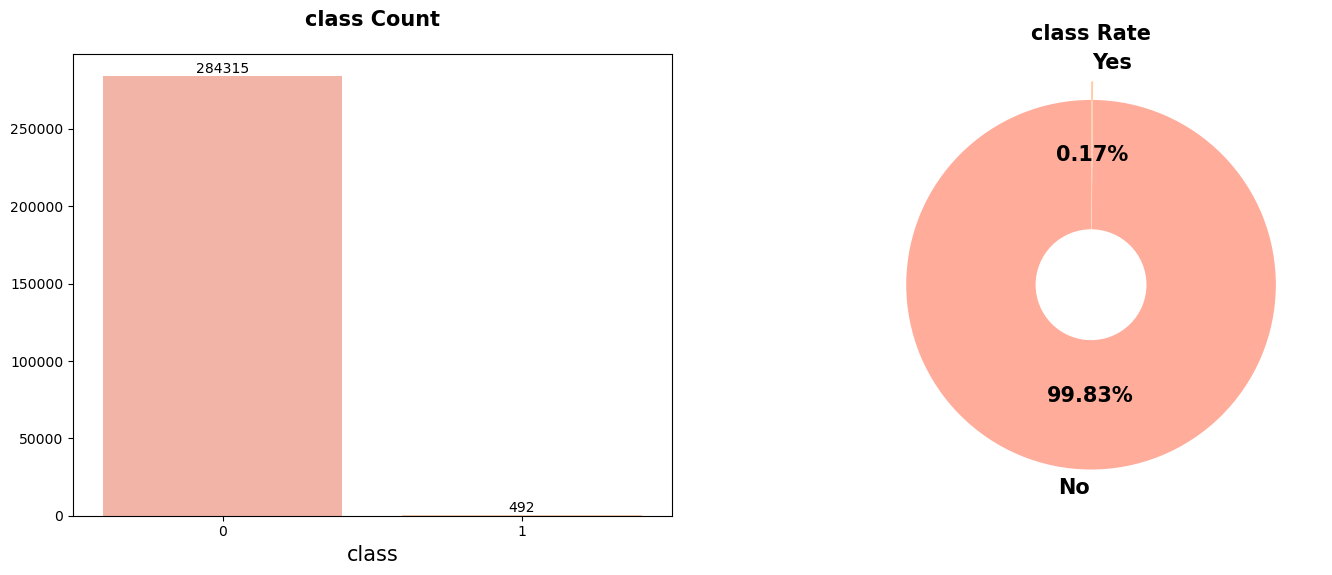

In [11]:
#Visualization to show EverDelinquent in Counts.
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
class_rate = data["Class"].value_counts()
ax=sns.barplot(x=class_rate.index,y=class_rate.values,palette=['#FFAC9B', '#FFCBA4'])
plt.title("class Count",fontweight="black",size=15,pad=20)
plt.xlabel("class",size=15)
for i in ax.containers:
    ax.bar_label(i)


#Visualization to show EverDelinquent in Percentage.
plt.subplot(1,2,2)
plt.pie(class_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"fontweight":"black","size":15},
        colors =['#FFAC9B', '#FFCBA4'],explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("class Rate",fontweight="black",size=15,pad=10)
plt.show()


In [12]:
num=['Time','Amount']

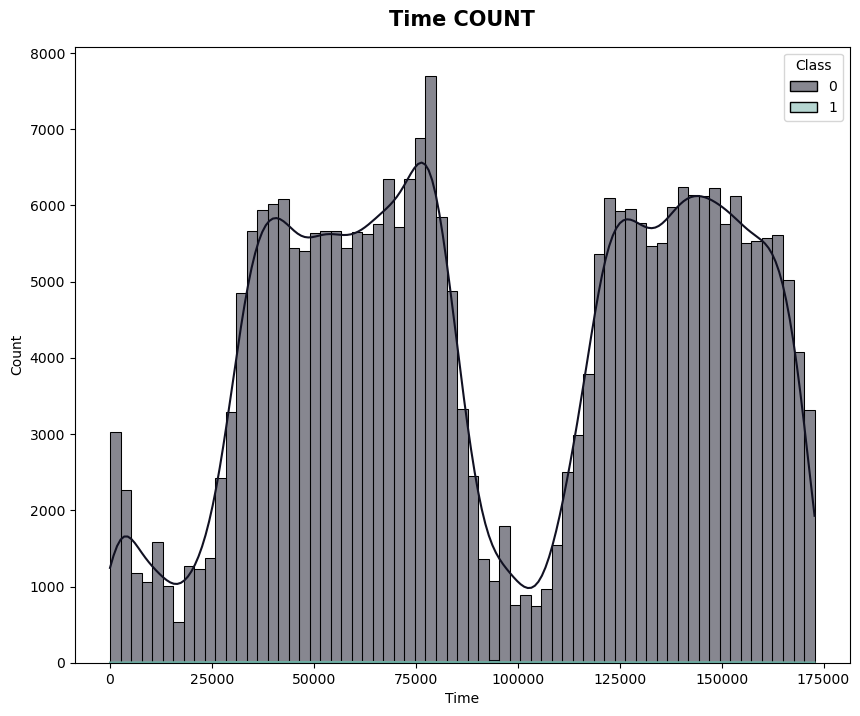

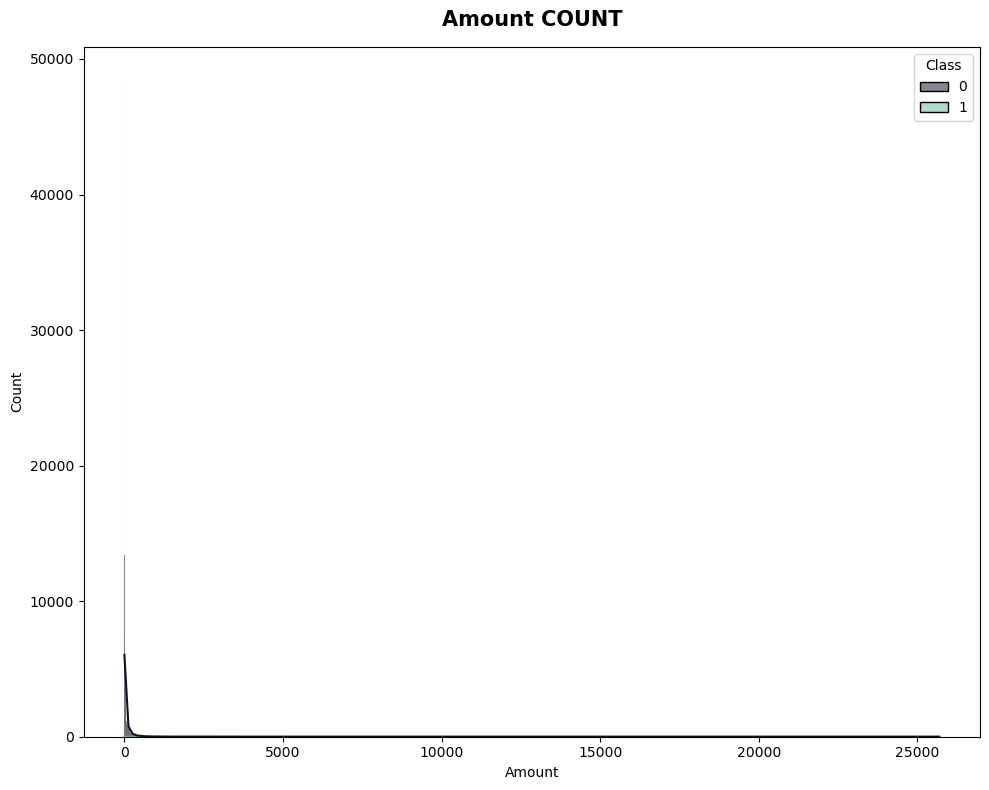

In [13]:
for col in num:
    plt.figure(figsize=(10,8))
    sns.histplot(x=data[col],kde=True, hue='Class',data=data,palette=["#1126","#6faea4"])
    plt.title(f"{col} COUNT",fontweight="black",size=15,pad=15)
    
plt.tight_layout()
plt.show()

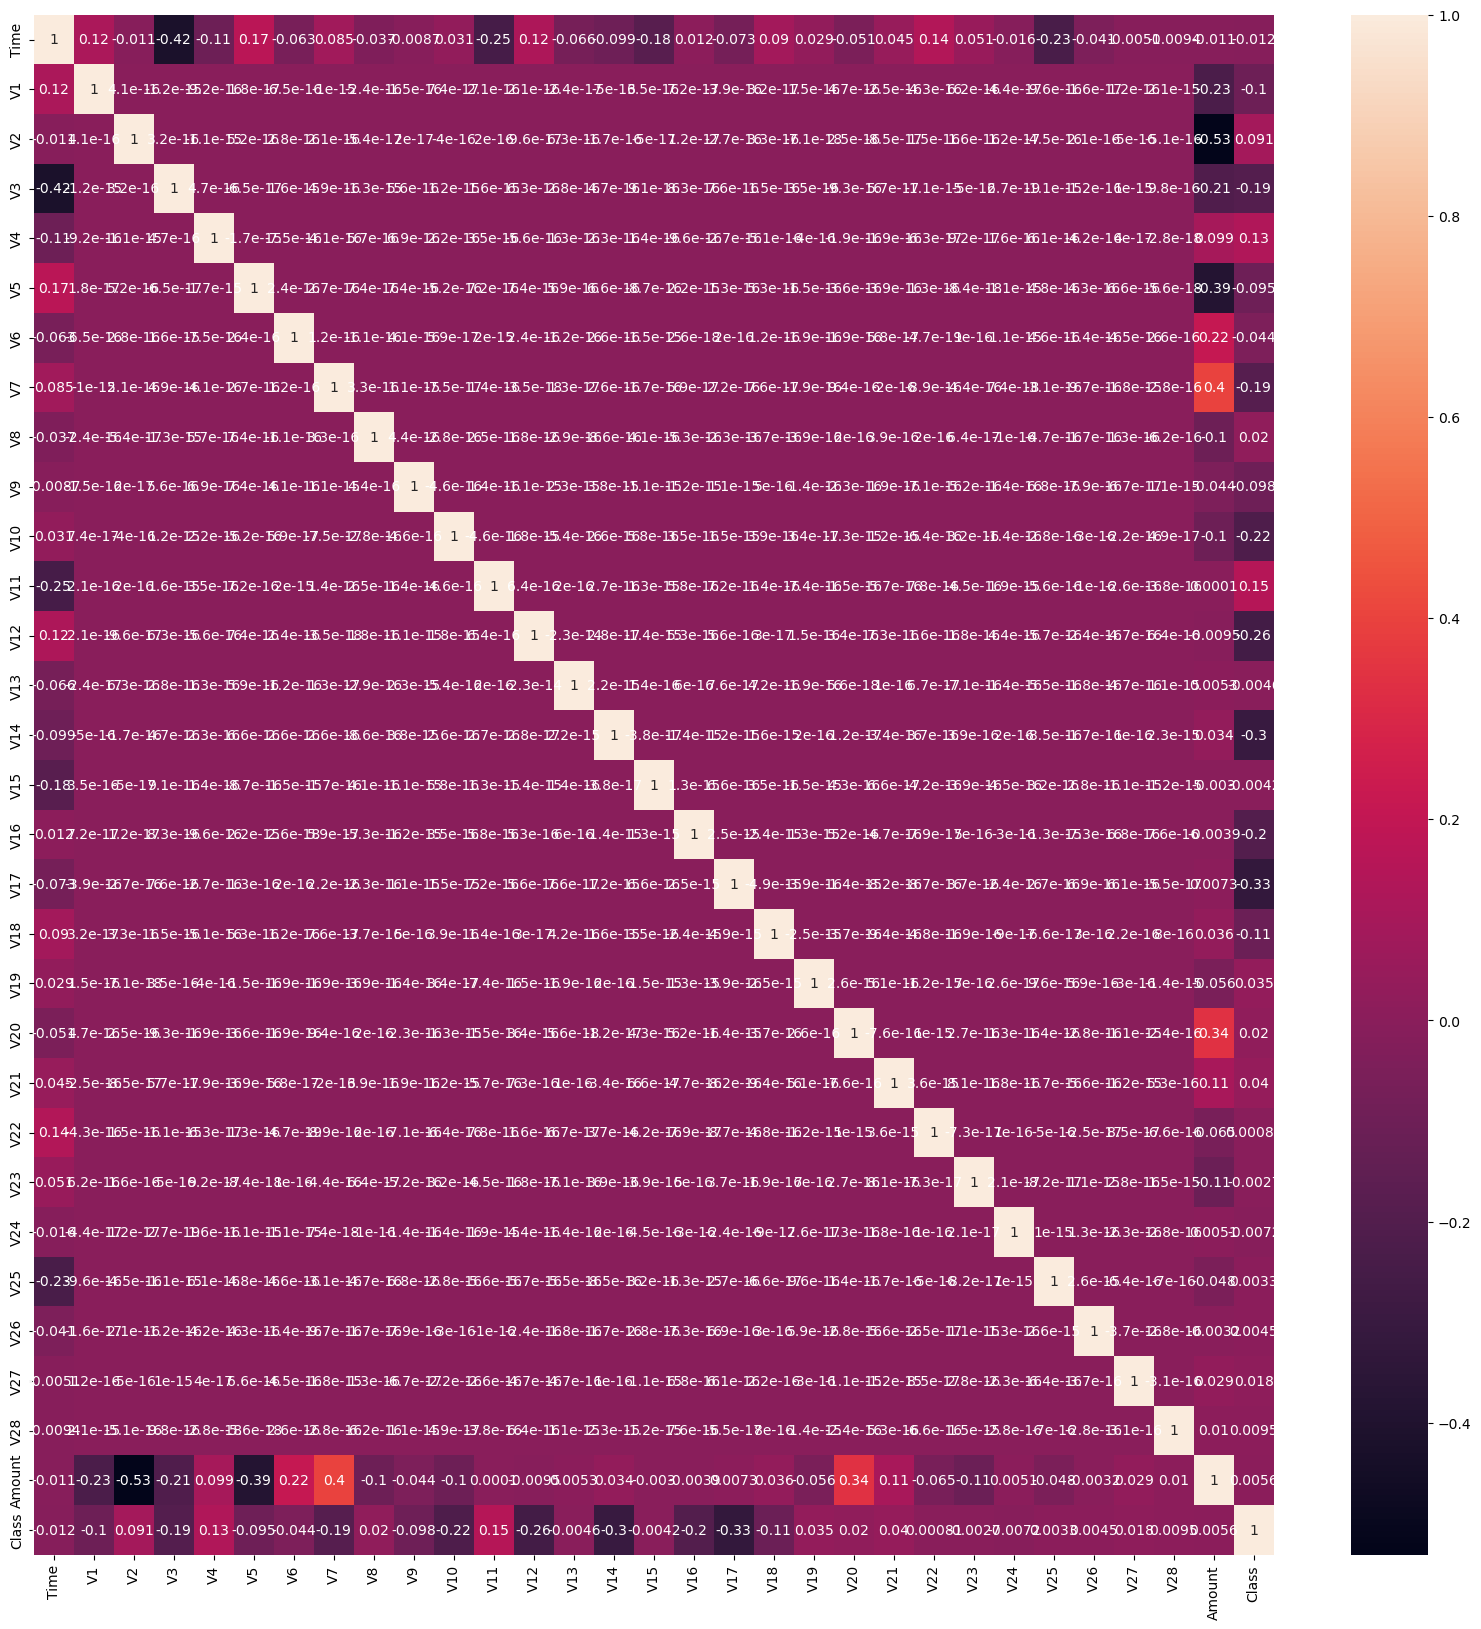

In [14]:
# correlation using heatmap
corr=data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.show()

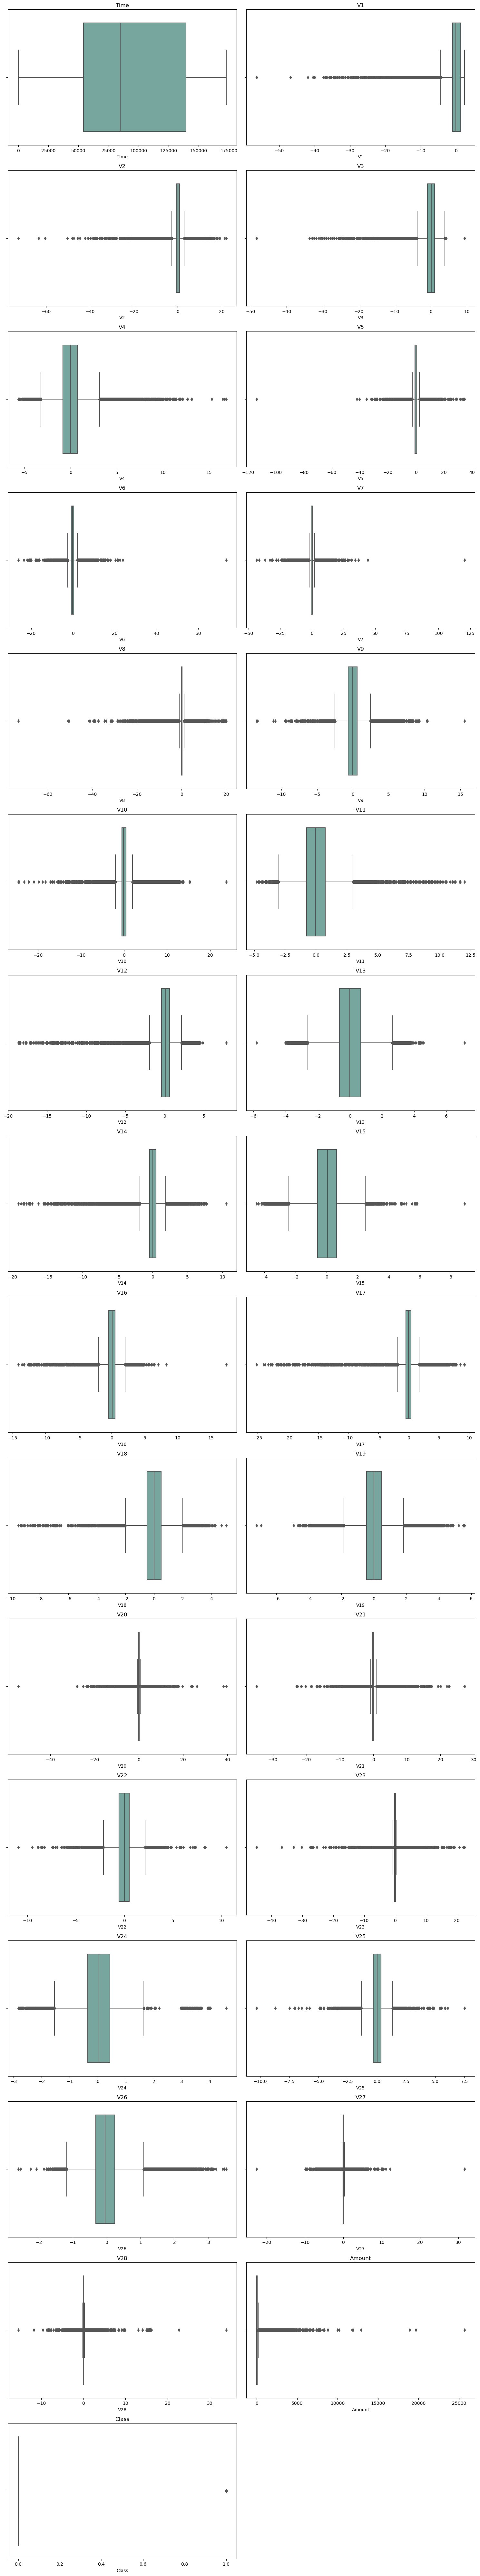

In [15]:
# Get the numerical columns
numerical_cols = data.columns

# Number of columns for the subplot grid
num_cols = 2

# Calculate the number of rows needed
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numerical column
for idx, col in enumerate(numerical_cols):
    sns.boxplot(x=data[col],palette=["#6faea4"], ax=axes[idx])
    axes[idx].set_title(col)

# Hide any unused subplots
for ax in axes[len(numerical_cols):]:
    ax.set_visible(False)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [16]:
corr['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

In [17]:
def convert_and_adjust_time(float_time):
    # Step 1: Convert the float to an integer and then to a zero-padded string
    time_str = f"{int(float_time):06d}"
    
    # Split the string into hours, minutes, and seconds
    hours = int(time_str[:2])    # First two characters for hours
    minutes = int(time_str[2:4]) # Next two for minutes
    seconds = int(time_str[4:])   # Last two for seconds

    # Step 2: Handle the overflow of seconds
    if seconds >= 60:
        minutes += seconds // 60  # Convert excess seconds to minutes
        seconds = seconds % 60     # Keep the remainder for seconds
        
    # Handle overflow of minutes
    if minutes >= 60:
        hours += minutes // 60
        minutes = minutes % 60

    # Ensure hours are non-negative (for proper time representation)
    if hours < 0:
        hours = 0


    # Step 3: Create a proper time 
    return pd.to_datetime(f"{hours}:{minutes}:{seconds}",format='%H:%M:%S')

# Step 4: Apply the conversion function to the 'Time' column
data['Time'] = data['Time'].apply(convert_and_adjust_time)

#Step 2: Create new columns for hours and minutes
data['Hour'] = data['Time'].dt.hour
data['Minute'] = data['Time'].dt.minute




In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Time    284807 non-null  datetime64[ns]
 1   V1      284807 non-null  float64       
 2   V2      284807 non-null  float64       
 3   V3      284807 non-null  float64       
 4   V4      284807 non-null  float64       
 5   V5      284807 non-null  float64       
 6   V6      284807 non-null  float64       
 7   V7      284807 non-null  float64       
 8   V8      284807 non-null  float64       
 9   V9      284807 non-null  float64       
 10  V10     284807 non-null  float64       
 11  V11     284807 non-null  float64       
 12  V12     284807 non-null  float64       
 13  V13     284807 non-null  float64       
 14  V14     284807 non-null  float64       
 15  V15     284807 non-null  float64       
 16  V16     284807 non-null  float64       
 17  V17     284807 non-null  floa

In [19]:
data.drop('Time', axis=1, inplace=True)

In [20]:
data[data.duplicated()]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,Hour,Minute
33,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,...,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0,0,0
35,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,...,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0,0,0
113,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,...,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0,0,1
114,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,...,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0,0,1
115,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,...,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283456,2.028971,-0.028467,-1.431841,0.133875,0.349684,-0.540617,0.123716,-0.171423,0.235792,0.151173,...,0.025511,0.756136,0.257074,-0.160796,-0.021718,-0.060665,2.69,0,17,16
283483,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,-0.828015,...,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0,17,16
283485,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,-0.830603,...,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0,17,16
284191,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,-1.449823,...,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0,17,22


In [21]:
data.drop_duplicates(inplace=True)

In [22]:
data.shape

(282756, 32)

## Model Prediction





Now it is time to start building the model .The types of algorithms we are going to use to try to do anomaly detection on this dataset are as follows

### Isolation Forest Algorithm :
One of the newest techniques to detect anomalies is called Isolation Forests. The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.

This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set.

Typical machine learning methods tend to work better when the patterns they try to learn are balanced, meaning the same amount of good and bad behaviors are present in the dataset.

How Isolation Forests Work
The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

The way that the algorithm constructs the separation is by first creating isolation trees, or random decision trees. Then, the score is calculated as the path length to isolate the observation.


### Local Outlier Factor(LOF) Algorithm
The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors.

The number of neighbors considered, (parameter n_neighbors) is typically chosen 1) greater than the minimum number of objects a cluster has to contain, so that other objects can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by objects that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.

In [23]:
pca_columns = [f'V{i}' for i in range(1, 29)]
non_pca_columns = ['Amount','Hour', 'Minute']

In [24]:
X=data.drop('Class', axis=1)
y=data['Class']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [26]:
# Scale non-PCA columns in the training set
scaler = StandardScaler()
X_train[non_pca_columns] = scaler.fit_transform(X_train[non_pca_columns])

# Transform the test set using the same scaler
X_test[non_pca_columns] = scaler.transform(X_test[non_pca_columns])

In [27]:
# Combine scaled non-PCA columns with PCA columns for both training and test sets
X_train_combined = pd.concat([X_train[pca_columns], X_train[non_pca_columns]], axis=1)
X_test_combined = pd.concat([X_test[pca_columns], X_test[non_pca_columns]], axis=1)

In [28]:
# Step 2: Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_combined, y_train)

In [29]:
from collections import Counter
print("The number of classes before fit {}",format(Counter(y_train)))
print("The number of classes after fit {}",format(Counter(y_resampled)))

The number of classes before fit {} Counter({0: 197586, 1: 343})
The number of classes after fit {} Counter({0: 197586, 1: 197586})


In [30]:
df=pd.DataFrame(X_resampled, columns=X_train.columns)

In [31]:
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Hour      0
Minute    0
dtype: int64

In [32]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Hour,Minute
0,-1.824846,0.636616,-0.066866,-2.315064,2.684911,3.016292,-0.090043,0.549375,2.087065,0.403637,...,-0.743805,-0.346251,1.001154,-0.136197,0.667566,0.269473,0.145381,-0.169222,-1.759998,-0.537689
1,0.996255,-0.523640,0.125035,0.351732,-0.104937,0.801025,-0.251046,0.310627,-1.176365,0.595121,...,-1.273609,0.333566,-0.764172,-0.121409,-0.636750,0.081274,0.029340,-0.018010,-0.499839,1.229539
2,-0.152487,-0.352665,1.433768,-2.193342,-1.145774,-0.695953,-0.358799,-0.010324,-1.561053,0.904585,...,0.176101,-0.070661,0.322262,-0.410060,-0.346779,0.443171,0.234861,-0.339248,-0.499839,1.797577
3,1.877741,-0.557850,-0.623738,0.104855,-0.492192,-0.396256,-0.356316,-0.055758,1.218656,-0.248395,...,-0.643031,0.372044,0.707566,-0.506823,-0.366541,-0.013033,-0.017201,-0.035616,1.390400,-0.727035
4,2.032686,0.859490,-1.929385,3.738195,1.159296,-0.969263,1.090629,-0.468451,-1.517519,1.637277,...,0.775888,-0.161080,-0.102048,0.678360,0.373808,-0.107968,-0.082842,-0.341118,1.390400,1.671346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395167,1.130841,1.253019,-1.383679,2.098223,0.817649,-1.055855,0.354864,-0.068888,0.045108,-2.138453,...,-0.735094,-0.118848,-0.174520,0.658327,-0.319673,0.102641,0.125296,-0.343143,-0.521090,-0.471007
395168,-0.126677,1.077121,0.502100,1.548099,0.995844,-0.942848,1.251146,-0.273858,-1.002656,-0.021679,...,0.295738,-0.262998,0.120286,0.472629,-0.150088,-0.154794,-0.162604,-0.271790,0.407303,0.242665
395169,-0.912667,3.388163,-7.089260,3.176446,-1.419539,-2.382286,-2.353268,1.248612,-2.253722,-5.063851,...,0.655201,0.125823,0.148715,-0.467188,0.061694,0.392017,0.181755,0.083488,1.180374,-0.638476
395170,-0.632391,1.549623,-5.398615,5.644436,2.632832,-2.243233,-1.441565,0.654265,-2.935563,-3.210165,...,-0.637244,-0.058338,0.081540,-0.226228,0.071379,0.431019,0.055371,-0.338177,0.984158,0.039079


In [33]:
rf_model = RandomForestClassifier(n_estimators=42)
rf_model.fit(X_resampled,y_resampled)
y_pred = rf_model.predict(X_test_combined)
rf_acc=accuracy_score(y_test,y_pred)
print("Accuracy is:",rf_acc*100)
print("Results from RandomForest Classifier")
result = classification_report(y_pred,y_test,output_dict=True)
result = pd.DataFrame(result).transpose()
result.style.background_gradient(cmap="PuBuGn")

Accuracy is: 99.94459311304183
Results from RandomForest Classifier


,precision,recall,f1-score,support
0,0.999787,0.999658,0.999723,84708.000000
1,0.776923,0.848739,0.811245,119.000000
accuracy,0.999446,0.999446,0.999446,0.999446
macro avg,0.888355,0.924199,0.905484,84827.000000
weighted avg,0.999475,0.999446,0.999458,84827.000000


In [34]:
y_test

74464     0
264913    0
147968    0
203969    0
97047     0
         ..
35196     0
169743    0
10151     0
144696    0
191686    0
Name: Class, Length: 84827, dtype: int64

In [35]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
print(confusion_matrix(y_test,y_pred))

[[84679    18]
 [   29   101]]


In [37]:
y_train_pred = rf_model.predict(X_resampled)
print('train accuracy score:',accuracy_score(y_resampled, y_train_pred))

train accuracy score: 0.999997469456338


In [38]:
cat_model=CatBoostClassifier(verbose=0)
cat_model.fit(X_resampled,y_resampled)
y_pred = cat_model.predict(X_test_combined)
cat_acc=accuracy_score(y_test,y_pred)
print("Accuracy is:",cat_acc*100)
print(confusion_matrix(y_test,y_pred))
print("Results from Catboost Classifier")
result = classification_report(y_pred,y_test,output_dict=True)
result = pd.DataFrame(result).transpose()
result.style.background_gradient(cmap="PuBuGn")

Accuracy is: 99.84674690841359
[[84593   104]
 [   26   104]]
Results from Catboost Classifier


,precision,recall,f1-score,support
0,0.998772,0.999693,0.999232,84619.000000
1,0.800000,0.500000,0.615385,208.000000
accuracy,0.998467,0.998467,0.998467,0.998467
macro avg,0.899386,0.749846,0.807308,84827.000000
weighted avg,0.998285,0.998467,0.998291,84827.000000


In [39]:
y_train_pred = cat_model.predict(X_resampled)
print('train accuracy score:',accuracy_score(y_resampled, y_train_pred))

train accuracy score: 0.999711518022532


In [40]:
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_resampled,y_resampled)
y_pred = ab_clf.predict(X_test_combined)
ab_acc=accuracy_score(y_test,y_pred)
print("Accuracy is:",ab_acc*100)
print(confusion_matrix(y_test,y_pred))
print("Results from Adaboost Classifier")
result = classification_report(y_pred,y_test,output_dict=True)
result = pd.DataFrame(result).transpose()
result.style.background_gradient(cmap="PuBuGn")

Accuracy is: 98.18454029966873
[[83177  1520]
 [   20   110]]
Results from Adaboost Classifier


,precision,recall,f1-score,support
0,0.982054,0.999760,0.990828,83197.000000
1,0.846154,0.067485,0.125000,1630.000000
accuracy,0.981845,0.981845,0.981845,0.981845
macro avg,0.914104,0.533622,0.557914,84827.000000
weighted avg,0.979442,0.981845,0.974190,84827.000000


In [41]:
y_train_pred = ab_clf.predict(X_resampled)
print('train accuracy score:',accuracy_score(y_resampled, y_train_pred))

train accuracy score: 0.9710176834391101


In [42]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_resampled,y_resampled)
y_pred = xgb_clf.predict(X_test_combined)
xgb_acc=accuracy_score(y_test,y_pred)
print("Accuracy is:",xgb_acc*100)
print(confusion_matrix(y_test,y_pred))
print("Results from Xgboost Classifier")
result = classification_report(y_pred,y_test,output_dict=True)
result = pd.DataFrame(result).transpose()
result.style.background_gradient(cmap="PuBuGn")

Accuracy is: 99.93044667381848
[[84665    32]
 [   27   103]]
Results from Xgboost Classifier


,precision,recall,f1-score,support
0,0.999622,0.999681,0.999652,84692.000000
1,0.792308,0.762963,0.777358,135.000000
accuracy,0.999304,0.999304,0.999304,0.999304
macro avg,0.895965,0.881322,0.888505,84827.000000
weighted avg,0.999292,0.999304,0.999298,84827.000000


In [43]:
y_train_pred = xgb_clf.predict(X_resampled)
print('train accuracy score:',accuracy_score(y_resampled, y_train_pred))

train accuracy score: 1.0


In [44]:
model_iso=IsolationForest(contamination=0.01, verbose=0)
y_test_pred = model_iso.fit_predict(X_test_combined)
y_test_pred = np.where(y_test_pred == -1, 1, 0)  # -1 for outliers

iso_acc=accuracy_score(y_test,y_test_pred)
print("Accuracy is:",iso_acc*100)
print(confusion_matrix(y_test,y_test_pred))
print("Results from Isolation Forest")
result = classification_report(y_pred,y_test_pred,output_dict=True)
result = pd.DataFrame(result).transpose()
result.style.background_gradient(cmap="PuBuGn")

Accuracy is: 99.02979004326453
[[83926   771]
 [   52    78]]
Results from Isolation Forest


,precision,recall,f1-score,support
0,0.999405,0.990979,0.995174,84692.000000
1,0.100118,0.629630,0.172764,135.000000
accuracy,0.990404,0.990404,0.990404,0.990404
macro avg,0.549761,0.810304,0.583969,84827.000000
weighted avg,0.997973,0.990404,0.993865,84827.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


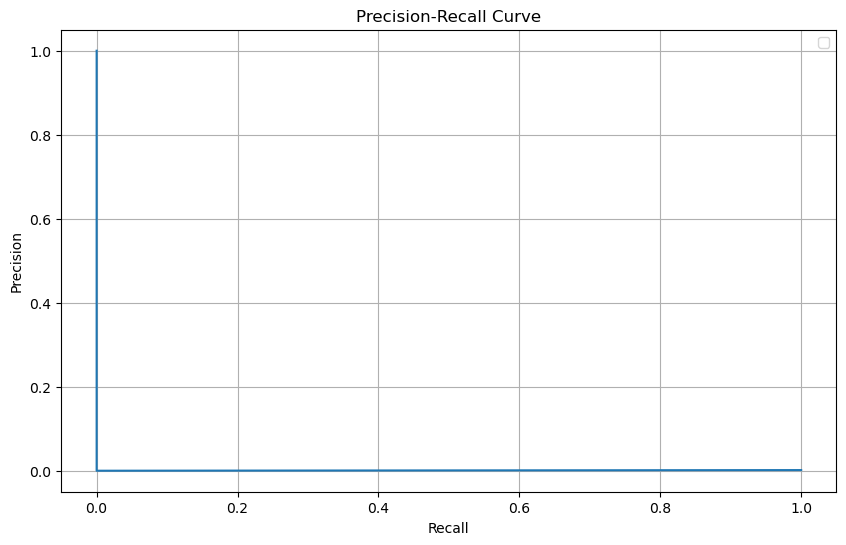

In [45]:
# Calculate precision and recall for Isolation Forest
iso_scores = model_iso.decision_function(X_test_combined)
precision_iso, recall_iso, _ = precision_recall_curve(y_test,iso_scores)

# Plotting Precision-Recall Curves
plt.figure(figsize=(10, 6))
plt.plot(recall_iso, precision_iso)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

In [46]:
model_lof=LocalOutlierFactor(n_neighbors=20, contamination=0.01)
y_test_pred = model_lof.fit_predict(X_test_combined)
y_test_pred = np.where(y_test_pred == -1, 1, 0)  # -1 for outliers

lof_acc=accuracy_score(y_test,y_test_pred)
print("Accuracy is:",lof_acc*100)
print(confusion_matrix(y_test,y_test_pred))
print("Results from Local Outlier Factor")
result = classification_report(y_pred,y_test_pred,output_dict=True)
result = pd.DataFrame(result).transpose()
result.style.background_gradient(cmap="PuBuGn")

Accuracy is: 98.87417921180756
[[83860   837]
 [  118    12]]
Results from Local Outlier Factor


,precision,recall,f1-score,support
0,0.998547,0.990129,0.994320,84692.000000
1,0.015312,0.096296,0.026423,135.000000
accuracy,0.988706,0.988706,0.988706,0.988706
macro avg,0.506930,0.543213,0.510372,84827.000000
weighted avg,0.996982,0.988706,0.992780,84827.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


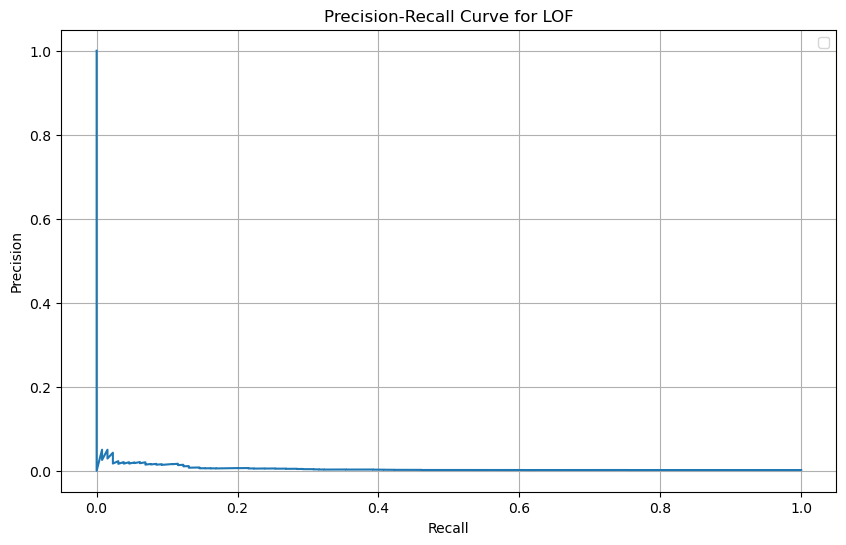

In [47]:
# Get LOF scores for PR curve
lof_scores = -model_lof.negative_outlier_factor_  # For the test data
precision_lof, recall_lof, _ = precision_recall_curve(y_test, lof_scores)

# Plotting Precision-Recall Curves
plt.figure(figsize=(10, 6))
plt.plot(recall_lof, precision_lof)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for LOF')
plt.legend()
plt.grid()
plt.show()


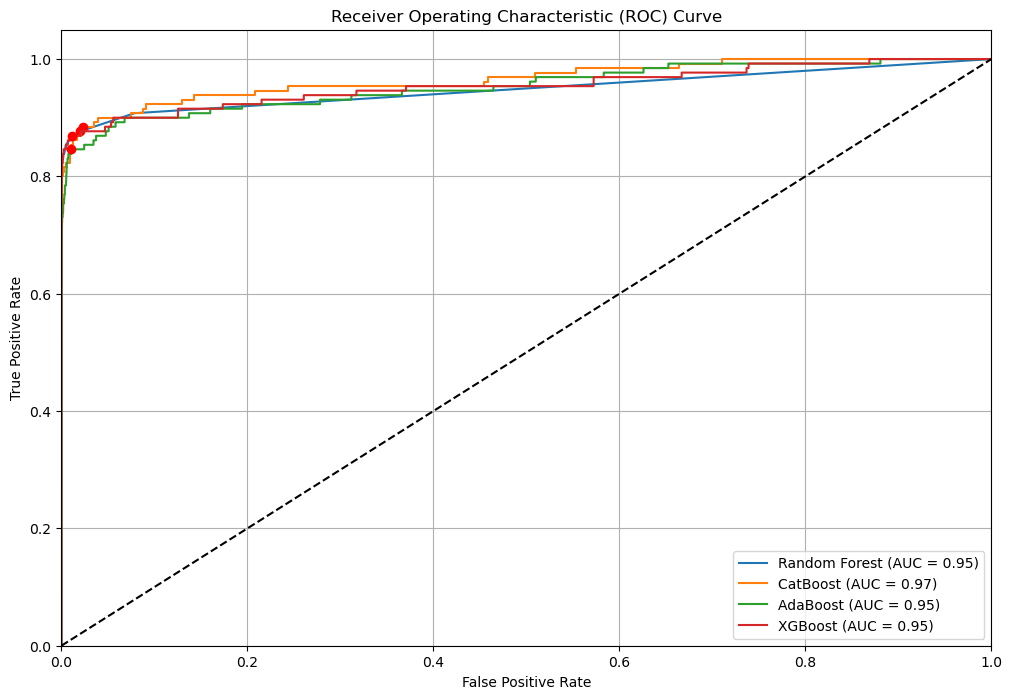

In [48]:
# Assuming you have your models' predictions and true labels
# Replace these with your actual variables

models = {
    "Random Forest":rf_model.predict_proba(X_test_combined)[:, 1],  # predicted probabilities for Random Forest
    "CatBoost": cat_model.predict_proba(X_test_combined)[:, 1],  # predicted probabilities for CatBoost
    "AdaBoost": ab_clf.predict_proba(X_test_combined)[:, 1],  # predicted probabilities for AdaBoost
    "XGBoost": xgb_clf.predict_proba(X_test_combined)[:, 1],    # predicted probabilities for XGBoost
    # For Local Outlier Factor and Isolation Forest, you'll need to handle differently
}

# Initialize plot
plt.figure(figsize=(12, 8))

# Calculate and plot ROC for each model
for model_name, probabilities in models.items():
    fpr, tpr, thresholds = roc_curve(y_test, probabilities)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    # Mark the optimal threshold (You can customize this as needed)
    optimal_idx = np.argmax(tpr - fpr)  # Optimal point for threshold
    optimal_threshold = thresholds[optimal_idx]
    plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro')  # Mark the point

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()

# Show plot
plt.show()


In [49]:
x_new=df[['Amount','Hour','Minute']]

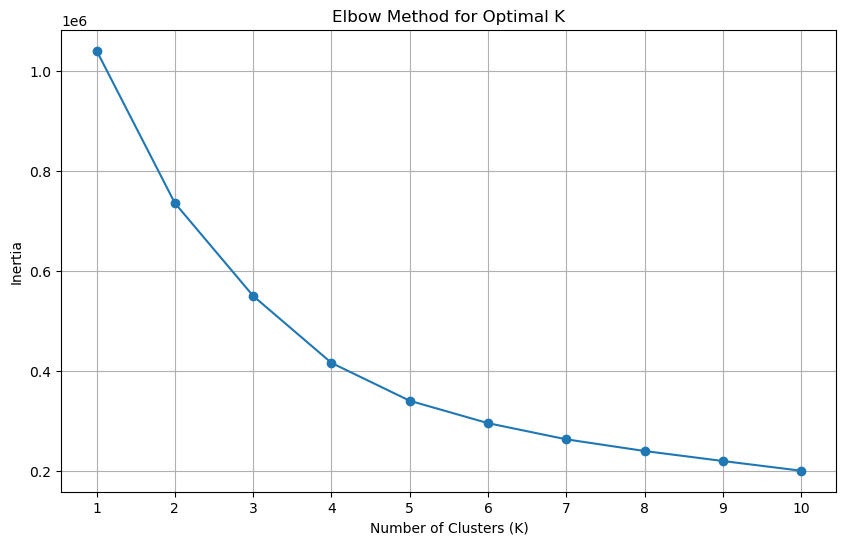

In [50]:
inertia = []
k_values = range(1, 11)  # Test for 1 to 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_new)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.xticks(k_values)
plt.show()

In [51]:
import joblib

# Save the model
joblib.dump(rf_model,'model.pkl')

['model.pkl']

In [52]:
model = joblib.load('model.pkl')

In [53]:
# Fit KMeans on the resampled training data
clusterer = KMeans(n_clusters=3, random_state=42)
clusterer.fit(x_new)  
print(f"Features for KMeans: {x_new}")  

Features for KMeans:           Amount      Hour    Minute
0      -0.169222 -1.759998 -0.537689
1      -0.018010 -0.499839  1.229539
2      -0.339248 -0.499839  1.797577
3      -0.035616  1.390400 -0.727035
4      -0.341118  1.390400  1.671346
...          ...       ...       ...
395167 -0.343143 -0.521090 -0.471007
395168 -0.271790  0.407303  0.242665
395169  0.083488  1.180374 -0.638476
395170 -0.338177  0.984158  0.039079
395171  0.042444 -0.919892 -0.916381

[395172 rows x 3 columns]


In [54]:
# Add cluster labels to the resampled training data
x_new['Cluster'] = clusterer.labels_ 
x_new.head()  # Display first few rows of cluster assignments

,Amount,Hour,Minute,Cluster
0,-0.169222,-1.759998,-0.537689,0
1,-0.018010,-0.499839,1.229539,2
2,-0.339248,-0.499839,1.797577,2
3,-0.035616,1.390400,-0.727035,1
4,-0.341118,1.390400,1.671346,2


In [55]:
# Check unique cluster labels assigned
print(f"Cluster labels: {np.unique(clusterer.labels_)}")  # Should show [0, 1, 2]

# Count the number of unique clusters
n_clusters = len(np.unique(clusterer.labels_))
print(f"Number of clusters found: {n_clusters}")  # Should be 3

Cluster labels: [0 1 2]
Number of clusters found: 3


In [56]:
if len(df) == len(x_new):
    # Concatenate along the columns
    combined_df = pd.concat([df.reset_index(drop=True), 
                              x_new['Cluster'].reset_index(drop=True)], axis=1)
else:
    print("The number of rows in x_resampled_dataframe and x_new do not match!")

# Display the combined DataFrame
print(combined_df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.824846  0.636616 -0.066866 -2.315064  2.684911  3.016292 -0.090043   
1  0.996255 -0.523640  0.125035  0.351732 -0.104937  0.801025 -0.251046   
2 -0.152487 -0.352665  1.433768 -2.193342 -1.145774 -0.695953 -0.358799   
3  1.877741 -0.557850 -0.623738  0.104855 -0.492192 -0.396256 -0.356316   
4  2.032686  0.859490 -1.929385  3.738195  1.159296 -0.969263  1.090629   

         V8        V9       V10  ...       V23       V24       V25       V26  \
0  0.549375  2.087065  0.403637  ... -0.346251  1.001154 -0.136197  0.667566   
1  0.310627 -1.176365  0.595121  ...  0.333566 -0.764172 -0.121409 -0.636750   
2 -0.010324 -1.561053  0.904585  ... -0.070661  0.322262 -0.410060 -0.346779   
3 -0.055758  1.218656 -0.248395  ...  0.372044  0.707566 -0.506823 -0.366541   
4 -0.468451 -1.517519  1.637277  ... -0.161080 -0.102048  0.678360  0.373808   

        V27       V28    Amount      Hour    Minute  Cluster  
0  0.

In [57]:
combined_df.isnull().sum()

V1         0
V2         0
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
Amount     0
Hour       0
Minute     0
Cluster    0
dtype: int64

In [58]:
# Save the model
joblib.dump(clusterer,'cluster.pkl')
cluster=joblib.load('cluster.pkl')

In [59]:
def predict_fraud(amount,hour, minute):
    # Create a DataFrame for the new transaction
    new_transaction = pd.DataFrame({
        'Amount': [amount],
        'Hour': [hour],
        'Minute': [minute],
    })

    # Standardize the new transaction using the scaler
    new_transaction_scaled = scaler.transform(new_transaction[non_pca_columns])
    
    # Get the scaled hour, minute, and amount
    scaled_amount = new_transaction_scaled[0][0]
    scaled_hour = new_transaction_scaled[0][1]
    scaled_minute = new_transaction_scaled[0][2]
    # Check for existing transactions that match closely (old user)
    similar_transactions = df[    
        (np.abs(df['Amount'] - scaled_amount) < 1e-5)& # Use tolerance for Amount
        (np.abs(df['Hour'] - scaled_hour) < 1e-5) &  # Use scaled values and tolerance
        (np.abs(df['Minute'] - scaled_minute) < 1e-5) ]

    if not similar_transactions.empty:
        print("Old User: Using existing PCA components.")
        # Get PCA components from the most recent matching transaction
        pca_components = similar_transactions.loc[similar_transactions.index[-1], [f'V{i+1}' for i in range(28)]].values
    else:
        print("New User: Using clustering to find PCA components.")
        
        # Predict the cluster for the new transaction
        cluster_label = cluster.predict(new_transaction_scaled)[0]
        print(f"Predicted Cluster: {cluster_label}")

        # Retrieve the members of the predicted cluster
        cluster_members = combined_df[combined_df['Cluster'] == cluster_label]

        if cluster_members.empty:
            print("No cluster members found for prediction.")
            return

        # Find the most similar transaction in the cluster based on hour, minute, and amount
        distances = np.abs(cluster_members['Hour'] - scaled_hour) + np.abs(cluster_members['Minute'] - scaled_minute) + np.abs(cluster_members['Amount'] - amount)
        similar_index = distances.idxmin()

        # Get PCA components from the most similar transaction
        pca_components = cluster_members.loc[similar_index, [f'V{i+1}' for i in range(28)]].values
        print(f"PCA Components for Prediction: {pca_components}")

    # Combine PCA components with the scaled hour, minute, and amount for the model input
    input_for_model = np.concatenate((pca_components, new_transaction_scaled[0]))
    print(f"Input for Model: {input_for_model}")

    # Predict using the Random Forest model
    prediction = model.predict([input_for_model])
    probability = model.predict_proba([input_for_model])[0][1]

    # Print the result
    print(f"Prediction: {'Fraud' if prediction[0] == 1 else 'Not Fraud'}")
    print(f"Probability of Fraud: {probability:.4f}")

# Example usage
predict_fraud (0,0,4)


Old User: Using existing PCA components.
Input for Model: [-2.31222654  1.95199201 -1.60985073  3.99790559 -0.52218786 -1.42654532
 -2.53738731  1.39165725 -2.77008928 -2.77227214  3.20203321 -2.89990739
 -0.59522188 -4.28925378  0.38972412 -1.14074718 -2.83005567 -0.01682247
  0.41695571  0.12691056  0.51723237 -0.03504937 -0.46521108  0.3201982
  0.04451917  0.1778398   0.261145   -0.14327587 -0.34703851 -1.97002477
 -1.35818843]
Prediction: Fraud
Probability of Fraud: 0.9524


In [61]:
# Save the 
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [62]:
combined_df.to_csv('combined_df.csv',index=False)